In [1]:
import os
import sys
import json
from pathlib import Path
sys.path.append(os.path.abspath('..'))

from pcdms.InpaintingStage import *

2025-06-12 08:52:48.042529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-12 08:52:48.156501: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-12 08:52:48.186198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-12 08:52:48.431527: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-12 08:52:50.121064: W tensorflow/compiler/tf2

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
stage_config = InpaintingConfig(
    preloaded_feature_dino_path = BASE_DIR / "datasets/celebrities/mo_salah/dino.pt",
    preloaded_feature_clip_path = BASE_DIR / "datasets/celebrities/mo_salah/clip.pt",
    device="cuda")
stage = InpaintingStage(stage_config)

2025-06-12 08:53:05.408 | INFO     | pcdms.InpaintingStage:load_pipeline:155 - start loading pipeline ...


Loading Inpainting Stage Pipeline:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
from peft import PeftModel
from constants import BASE_DIR

stage.sd_model.sd_model = PeftModel.from_pretrained(stage.sd_model, BASE_DIR/"checkpoint/lora-2000")

/home/aliaagheis/miniconda3/envs/fast_env/lib/python3.12/site-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(
/home/aliaagheis/miniconda3/envs/fast_env/lib/python3.12/site-packages/peft/peft_model.py:569: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.default.weight', 'base_model.model.base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.default.weight', 'base_model.model.base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_A.default.weight', 'base_model.model.base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_k.lora_B.default.weight', 'base_model.model.base_model.model.down_blocks.0.attentions.0.transformer_block

In [8]:
# stage.sd_model.unet

In [13]:
from constants import BASE_DIR
sample_input_1 = InpaintingSampleInput(
    # s_img_path=Path(BASE_DIR / 'datasets/fashion/3430_train_sample/WOMEN_Dresses_id_00005936_03_7_additional.png').__str__(),
    # t_img_path=Path(BASE_DIR / 'datasets/fashion/3430_train_sample/WOMEN_Dresses_id_00005936_03_4_full.png').__str__(),
    s_img_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/cropped/000002.jpg').__str__(),
    t_img_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/cropped/000003.jpg').__str__(),
    s_pose_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/poses/000002.jpg').__str__(),
    t_pose_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/poses/000003.jpg').__str__(),
)

sample_input_2 = InpaintingSampleInput(
    s_img_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/cropped/000004.jpg').__str__(),
    t_img_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/cropped/000005.jpg').__str__(),
    s_pose_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/poses/000004.jpg').__str__(),
    t_pose_path=Path(BASE_DIR / 'datasets/celebrities/mohamed_salah/poses/000005.jpg').__str__(),
)

In [17]:
outputs = stage([sample_input_1])

  0%|          | 0/50 [00:00<?, ?it/s]

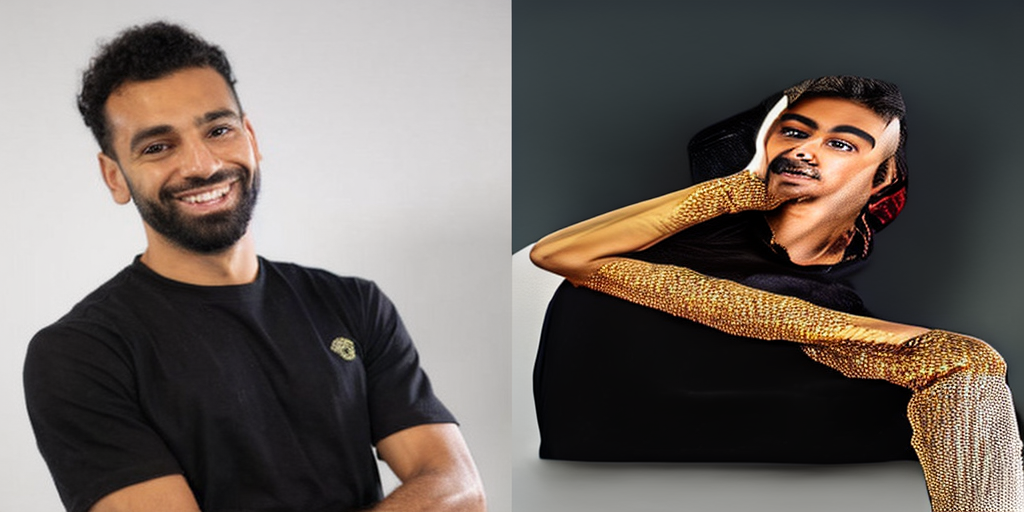

In [18]:
from utils import show_images
show_images(outputs)